<a href="https://colab.research.google.com/github/Yeow34/LifeExpectancyPrediction/blob/main/Copy_of_multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the necessary libraries. Read the file using the following method and display. The dataset is a 2938 x 19 matrix.

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Clean the dataset so that all NaN and inf types inside the data can be converted to float type.

In [2]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

Check the information of the dataset, ensuring that found that there are still Nan types inside the dataset. The column which contains no NaN type will have 2938 non-null counts.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Remove the first three columns: countries' names, year and their status. All of these data can already be represented by GDP and population. By removing them help reduce the complexity of computation since all of them are not significant.

In [4]:
df.drop(df.columns[[0,1,2]], axis=1, inplace= True)
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Add a bias term.

In [5]:
df=pd.concat([pd.Series(1, index=df.index, name='Bias'), df], axis=1)
df.head()

,Bias,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Switch the bias term with the Life Expectancy column for the sake of convenience.

In [6]:
titles=list(df.columns)
print(titles)

['Bias', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [7]:
titles[0],titles[1] = titles[1],titles[0]
df=df[titles]
df.head()

,Life expectancy,Bias,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,1,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,1,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,1,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,1,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Declare the variable "y" to include the to-be-predicted column, "life expectancy". At the same time, declare the variable "x" to include the remaining variables.

In [8]:
y=df.iloc[:,0]
x=df.iloc[:,1::]
print(x)

      Bias  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0        1            263.0             62     0.01               71.279624   
1        1            271.0             64     0.01               73.523582   
2        1            268.0             66     0.01               73.219243   
3        1            272.0             69     0.01               78.184215   
4        1            275.0             71     0.01                7.097109   
...    ...              ...            ...      ...                     ...   
2933     1            723.0             27     4.36                0.000000   
2934     1            715.0             26     4.06                0.000000   
2935     1             73.0             25     4.43                0.000000   
2936     1            686.0             25     1.72                0.000000   
2937     1            665.0             24     1.68                0.000000   

      Hepatitis B  Measles    BMI   under-five deat

Since the values vary in a great magnitude, it is better to normalize all the data for ease in computation.

In [9]:
normalized_x=(x-x.mean())/x.std()
normalized_x.head()

,Bias,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.0,0.790103,0.268778,-1.133365,-0.335513,-0.635838,-0.110366,-0.958951,0.255316,-3.267459,0.889322,-0.730453,-0.32339,-0.483449,0.343917,2.796324,2.756711,-0.704355,-0.563512
1,0.0,0.854468,0.285738,-1.133365,-0.334384,-0.755503,-0.168095,-0.983896,0.274014,-1.047897,0.897327,-0.856945,-0.32339,-0.481456,-0.203661,2.864194,2.801068,-0.718580,-0.593284
2,0.0,0.830331,0.302697,-1.133365,-0.334537,-0.675726,-0.173502,-1.008841,0.292712,-0.877162,0.877314,-0.772617,-0.32339,-0.480121,0.311058,2.909441,2.845424,-0.747029,-0.623055
3,0.0,0.862513,0.328137,-1.133365,-0.332040,-0.556061,0.032040,-1.033786,0.317642,-0.663742,1.033419,-0.646125,-0.32339,-0.477443,-0.148436,2.954688,2.911960,-0.780219,-0.652827
4,0.0,0.886650,0.345097,-1.133365,-0.367800,-0.516173,0.051748,-1.053742,0.342573,-0.621059,0.773244,-0.603961,-0.32339,-0.519939,-0.160210,3.022558,2.956317,-0.822893,-0.742141


Replace all the NaN type in "normalized_x" with the mean of each column.

In [10]:
normalized_x = normalized_x.replace(np.nan, x.mean())
normalized_x.head()

,Bias,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.0,0.790103,0.268778,-1.133365,-0.335513,-0.635838,-0.110366,-0.958951,0.255316,-3.267459,0.889322,-0.730453,-0.32339,-0.483449,0.343917,2.796324,2.756711,-0.704355,-0.563512
1,0.0,0.854468,0.285738,-1.133365,-0.334384,-0.755503,-0.168095,-0.983896,0.274014,-1.047897,0.897327,-0.856945,-0.32339,-0.481456,-0.203661,2.864194,2.801068,-0.718580,-0.593284
2,0.0,0.830331,0.302697,-1.133365,-0.334537,-0.675726,-0.173502,-1.008841,0.292712,-0.877162,0.877314,-0.772617,-0.32339,-0.480121,0.311058,2.909441,2.845424,-0.747029,-0.623055
3,0.0,0.862513,0.328137,-1.133365,-0.332040,-0.556061,0.032040,-1.033786,0.317642,-0.663742,1.033419,-0.646125,-0.32339,-0.477443,-0.148436,2.954688,2.911960,-0.780219,-0.652827
4,0.0,0.886650,0.345097,-1.133365,-0.367800,-0.516173,0.051748,-1.053742,0.342573,-0.621059,0.773244,-0.603961,-0.32339,-0.519939,-0.160210,3.022558,2.956317,-0.822893,-0.742141


Display the info about the variable and make sure that there's no more NaN type inside.

In [11]:
normalized_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Bias                             2938 non-null   float64
 1   Adult Mortality                  2938 non-null   float64
 2   infant deaths                    2938 non-null   float64
 3   Alcohol                          2938 non-null   float64
 4   percentage expenditure           2938 non-null   float64
 5   Hepatitis B                      2938 non-null   float64
 6   Measles                          2938 non-null   float64
 7    BMI                             2938 non-null   float64
 8   under-five deaths                2938 non-null   float64
 9   Polio                            2938 non-null   float64
 10  Total expenditure                2938 non-null   float64
 11  Diphtheria                       2938 non-null   float64
 12   HIV/AIDS           

Do the same for y. The type of all the data is in float64.

In [12]:
y=y.replace(np.nan,y.mean())
y.head()


0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

Define all the coefficients of the multivariate linear regression to 0.

In [13]:
theta= np.array([0]*len(x.columns))
theta

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
m=len(df)
m

2938

Return the hypothesis function as h(x)= theta0*x0 + theta1*x1 + theta2*x2 +...

In [15]:
def hypothesis(theta, normalized_x):
  return theta*normalized_x

Return the cost function as (1/2*m)* (Hypothetic y- real y) 

In [16]:
def computeCost(normalized_x, y, theta):
  y1=hypothesis(theta, normalized_x)
  y1=np.sum(y1, axis=1)
  return sum(np.sqrt((y1-y)**2)/(2*m))

Compute gradient descent. Define alpha as learning rate while i as the iteration steps required.

In [17]:
def gradientDescent(normalized_x, y, theta, alpha, i):
  J=[]
  k=0
  while k<i:
    y1=hypothesis(theta,x)
    y1=np.sum(y1,axis=1)
    for c in range(0, len(normalized_x.columns)):
      theta[c]=theta[c]-alpha*(sum((y1-y)*normalized_x.iloc[:,c])/len(normalized_x))
      j=computeCost(normalized_x, y, theta)
      J.append(j)
      k+=1
  return J,j,theta

Substitute the desired values of alpha and i for computation.

In [18]:
J,j,theta=gradientDescent(normalized_x, y, theta, 0.05, 20)

Compute the predicted y values by adding all the hypothetic y values at each x value

In [19]:
y_hat=hypothesis(theta, normalized_x)
y_hat=np.sum(y_hat, axis=1)

Display the results obtained based on the real y.

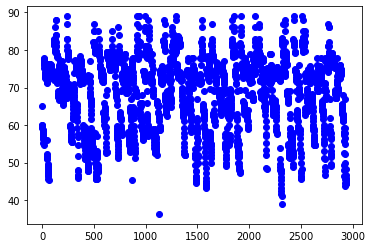

In [25]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0,m)), y=y, color= 'blue')
plt.show()

Display the results obtained based on the predicted y values.

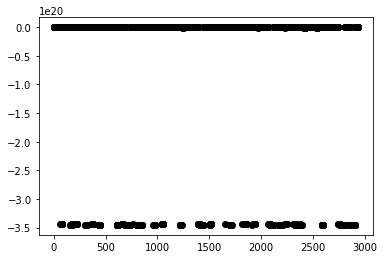

In [26]:
plt.scatter(x=list(range(0,m)), y=y_hat, color='black')
plt.show()

Both results generated deviated a lot. Therefore the project was not succesful. This might be improved through tuning the alpha values or even adding higher steps for iterations.